# Figure S7: upper-tropospheric cloud-radiative heating for the no radiation cyclone in ICON2.1 and ICON2.6 on day 6

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import sys; sys.path.append("../helperfuncs")
from myfunctions import dict_expid, zlevels, load_data, domainmean_per_level, domainmean, make_meancyclone

## Load radiation-off simulations.

Obtain simulation ids for no radiation simulations.

In [2]:
for expid in dict_expid:
    if "NORAD" in dict_expid[expid]: print(expid, ":", dict_expid[expid])

i2100-0002 : ICON2.1 NORAD
i2622-v2-0003 : ICON2.6 NORAD


In [3]:
i21 = load_data(expid="i2100-0002", chunks="auto")
i26 = load_data(expid="i2622-v2-0003", chunks="auto")

Select time step to plot. itime=0 is day 0.

In [4]:
itime = 24 # day 6

## Plotting.

Helper functions.

In [5]:
# vertical mean over several atmospheric level taking into account density of air
def mean_over_levels(data, rho):
    weights = rho
    weights.name = "weights"
    data_weighted = data.weighted(weights)
    return data_weighted.mean(["height"])

In [6]:
def make_nicemap():
    plt.ylim(20,80)
    plt.xticks([0, 10, 20, 30, 40, 50], ["", "10E", "", "30E", "", "50E"], fontsize=10)
    plt.yticks([20,30,40,50,60,70,80], ["","30N", "", "50N", "", "70N",""], fontsize=10)

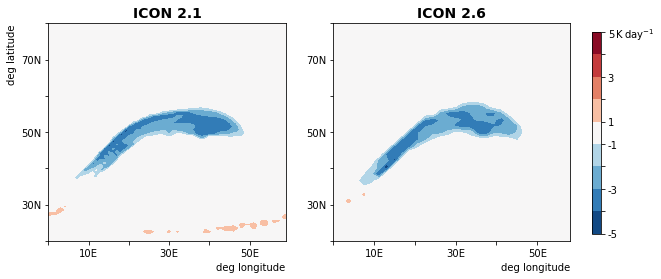

In [7]:
fig=plt.figure(figsize=(10,4))

# diagnostic cloud-radiative heating in the upper troposphere
clevels_crh = np.linspace(-5,5,11)[[0,1,2,3,4,6,7,8,9,10]]
iheight = np.argwhere((zlevels()<=12)*(zlevels()>=8)).flatten()

ax=plt.subplot(1,2,1)
plt.contourf(i21.lon[0:60]+180, i21.lat, make_meancyclone(mean_over_levels(i21["crh"].isel(time=itime, height=iheight), i21["rho"].isel(time=itime, height=iheight))),
             levels=clevels_crh, cmap="RdBu_r")
make_nicemap()
plt.xlabel("deg longitude", fontsize=10, loc="right"); plt.ylabel("deg latitude", fontsize=10, loc="top")
plt.title("ICON 2.1", fontsize=14, fontweight="bold")

ax=plt.subplot(1,2,2)
c=plt.contourf(i26.lon[0:32], i26.lat, make_meancyclone(mean_over_levels(i26["crh"].isel(time=itime, height=iheight), i26["rho"].isel(time=itime, height=iheight))),
             levels=clevels_crh, cmap="RdBu_r")
make_nicemap()
plt.xlabel("deg longitude", fontsize=10, loc="right"); 
plt.title("ICON 2.6", fontsize=14, fontweight="bold")

# make colorbar
fig.subplots_adjust(right=0.85, wspace=0.2)
cbar_ax = fig.add_axes([0.88, 0.15, 0.012, 0.7])
cbar=plt.colorbar(c, cax=cbar_ax, orientation='vertical')
cbar.set_ticks([-5,-4,-3,-2,-1,1,2,3,4,5])
cbar.set_ticklabels(["-5","","-3","","-1","1","","3","","5$\,$K$\,$day$^{-1}$"], fontsize=10)

plt.savefig("figure_S5.pdf")